In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data=pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
data.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [6]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Text(0.5,0,'GPA')

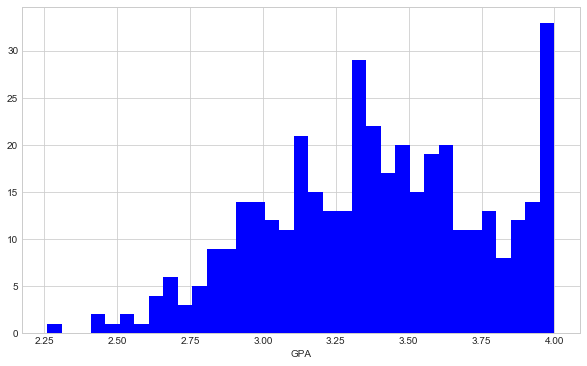

In [8]:
#visualization
plt.figure(figsize=(10,6))
plt.hist(data['gpa'],color='blue',bins=35)
plt.xlabel('GPA')

Text(0.5,0,'GRE')

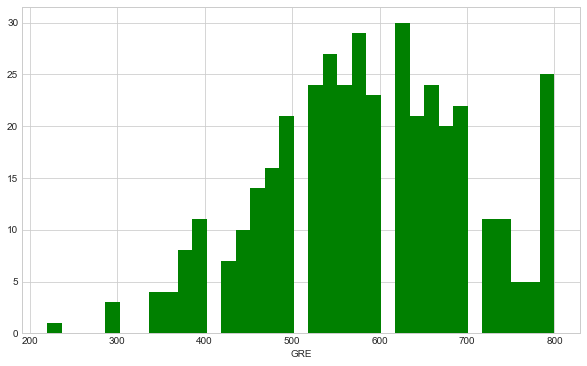

In [10]:
plt.figure(figsize=(10,6))
plt.hist(data['gre'],color='green',bins=35)
plt.xlabel('GRE')

Text(0.5,0,'admit')

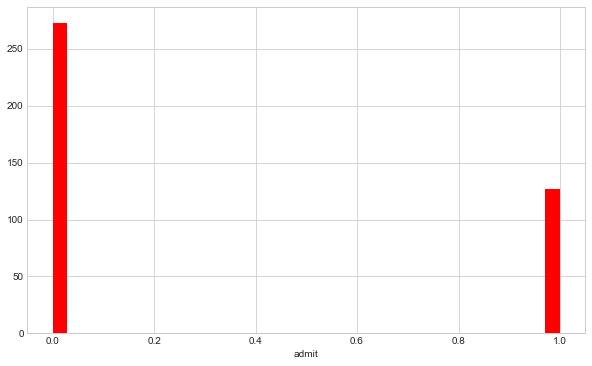

In [11]:
plt.figure(figsize=(10,6))
plt.hist(data['admit'],color='red',bins=35)
plt.xlabel('admit')

Text(0.5,0,'rank')

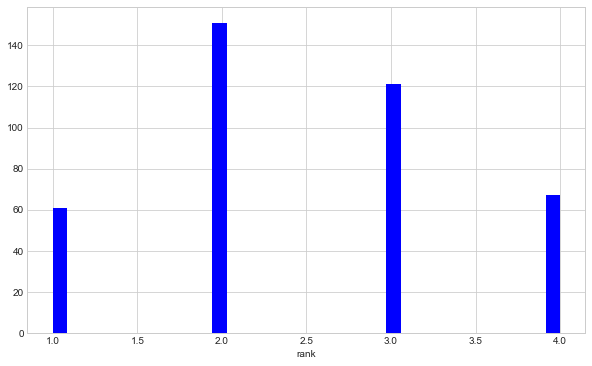

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['rank'],color='blue',bins=35)
plt.xlabel('rank')

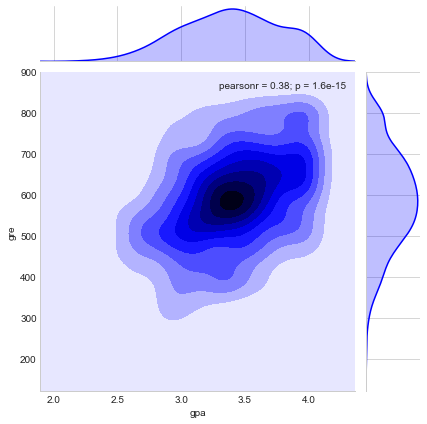

In [15]:
sns.jointplot(x='gpa' , y='gre', data=data,color='blue',kind='kde')#kind attribute kde

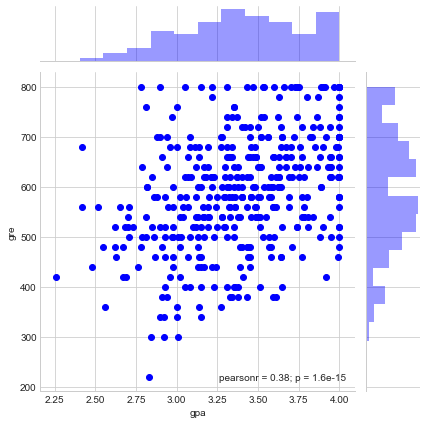

In [16]:
sns.jointplot(x='gpa' , y='gre', data=data,color='blue')

In [17]:
#create dummy variable for rank 1,2,3, will have 0 and rank 4 will be 1

In [18]:
dummy_ranks=pd.get_dummies(data['rank'],prefix = 'rank')

In [19]:
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [20]:
#multicolinearity:when u introduce a dummy var in ur dataset they ccan 1 dummy var can inflence another dummy var .
#it might be some interedependence among the dummy var then it is called multicolinearity. 
#to avoid it to exclude ur first dummy var.

In [22]:
df = ['admit' , 'gre','gpa']

In [27]:
my_data=data[df].join(dummy_ranks.ix[:,'rank_2':])#we only need rank 2,3,&4 [all the rows:rank2:after rank2 all we want]

In [28]:
my_data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [29]:
#adnit as target ,rest as features

In [30]:
from sklearn.cross_validation import train_test_split

C:\Users\farheen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X=my_data[["gre","gpa","rank_2","rank_3","rank_4"]]

In [32]:
y=my_data['admit']

In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=23)

In [36]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(280, 5) (280,) (120, 5) (120,)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predict=model.predict(X_test)

In [41]:
#classification report to evalute its prediction . it will tell us precision, recall and etc

In [42]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.77      0.90      0.83        88
          1       0.50      0.28      0.36        32

avg / total       0.70      0.73      0.71       120

